# Using Simple Regression and Correlation to help conduct EDA

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [50]:
cg_df = pd.read_parquet('cg_est', engine='pyarrow')
bh_df: pd.DataFrame = pd.read_parquet('bus_holdings', engine='pyarrow')
bus_cats_df = pd.read_parquet('bus_cats', engine='pyarrow')

One question we may want to ask is if businesses with a higher variety (i.e. more categories) tend to have higher review counts?

In [51]:
bus_cats_counts_df = bus_cats_df.groupby(['BusinessName'], as_index=False)['BusinessCategoryName'].count()
bus_cats_counts_df = bus_cats_counts_df.rename({'BusinessCategoryName': 'cat_counts'}, axis=1)
bus_cats_counts_df

,BusinessName,cat_counts
0,1-chinese-restaurant-coinjock,1
1,1-cow-ten-sleep,1
2,1-more-bar-and-grille-bright,2
3,1-north-steakhouse-hampton-bays-2,1
4,10-40-coffee-west-plains,1
...,...,...
63306,zzs-sports-bar-and-grill-adrian,2
63307,zzzz-s-pizzzza-burlington,1
63308,àlavita-boise-2,1
63309,ándale-caguas-2,2


In [6]:
most_recent_bus_df = bh_df.sort_values(by='CloseDate', ascending=True).groupby(['BusinessName'], as_index=False).last()
most_recent_bus_df

,BusinessName,ChainName,BusinessRating,ReviewCount,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta,CloseDate
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2.0,3.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
1,1-cow-ten-sleep,1 Cow,4.500000000,6,6.0,4.500000000,0.0,0E-9,0.0,0E-9,2022-02-07
2,1-more-bar-and-grille-bright,1 More Bar & Grille,4.000000000,9,9.0,4.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
3,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.000000000,149,149.0,4.000000000,0.0,0E-9,2.0,0E-9,2022-02-09
4,10-40-coffee-west-plains,10/40 Coffee,5.000000000,11,11.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
...,...,...,...,...,...,...,...,...,...,...,...
63312,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.500000000,10,10.0,3.500000000,0.0,0E-9,0.0,0E-9,2022-02-09
63313,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.000000000,1,1.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
63314,àlavita-boise-2,ÀLAVITA,4.000000000,307,307.0,4.000000000,0.0,0E-9,3.0,0E-9,2022-02-09
63315,ándale-caguas-2,Ándale,5.000000000,3,3.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-07


In [7]:
most_recent_bus_cats_df = pd.merge(left=most_recent_bus_df, right=bus_cats_counts_df, on='BusinessName', how='inner')
most_recent_bus_cats_df

,BusinessName,ChainName,BusinessRating,ReviewCount,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta,CloseDate,cat_counts
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2.0,3.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,1
1,1-cow-ten-sleep,1 Cow,4.500000000,6,6.0,4.500000000,0.0,0E-9,0.0,0E-9,2022-02-07,1
2,1-more-bar-and-grille-bright,1 More Bar & Grille,4.000000000,9,9.0,4.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,2
3,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.000000000,149,149.0,4.000000000,0.0,0E-9,2.0,0E-9,2022-02-09,1
4,10-40-coffee-west-plains,10/40 Coffee,5.000000000,11,11.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63306,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.500000000,10,10.0,3.500000000,0.0,0E-9,0.0,0E-9,2022-02-09,2
63307,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.000000000,1,1.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,1
63308,àlavita-boise-2,ÀLAVITA,4.000000000,307,307.0,4.000000000,0.0,0E-9,3.0,0E-9,2022-02-09,1
63309,ándale-caguas-2,Ándale,5.000000000,3,3.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-07,2


In [8]:
for col in most_recent_bus_cats_df.filter(regex= '[Rr]ating', axis=1).columns:
    most_recent_bus_cats_df[col] = most_recent_bus_cats_df[col].astype(float)
most_recent_bus_cats_df.dtypes

BusinessName                object
ChainName                   object
BusinessRating             float64
ReviewCount                  int64
previous_review_cnt        float64
previous_rating            float64
abs_review_diff            float64
abs_rating_diff            float64
total_review_cnt_delta     float64
total_bus_rating_delta     float64
CloseDate                 category
cat_counts                   int64
dtype: object

In [9]:
cat_counts_corr = most_recent_bus_cats_df.corr()['cat_counts']
cat_counts_corr.sort_values()

BusinessRating           -0.050409
previous_rating          -0.049321
total_bus_rating_delta   -0.005122
abs_rating_diff          -0.001098
abs_review_diff           0.043315
ReviewCount               0.104611
previous_review_cnt       0.104869
total_review_cnt_delta    0.120964
cat_counts                1.000000
Name: cat_counts, dtype: float64

The greatest correlation that `cat_counts` has seems to be with columns related to the review count. These correlations can be visualized so we can see such correlation a bit easier

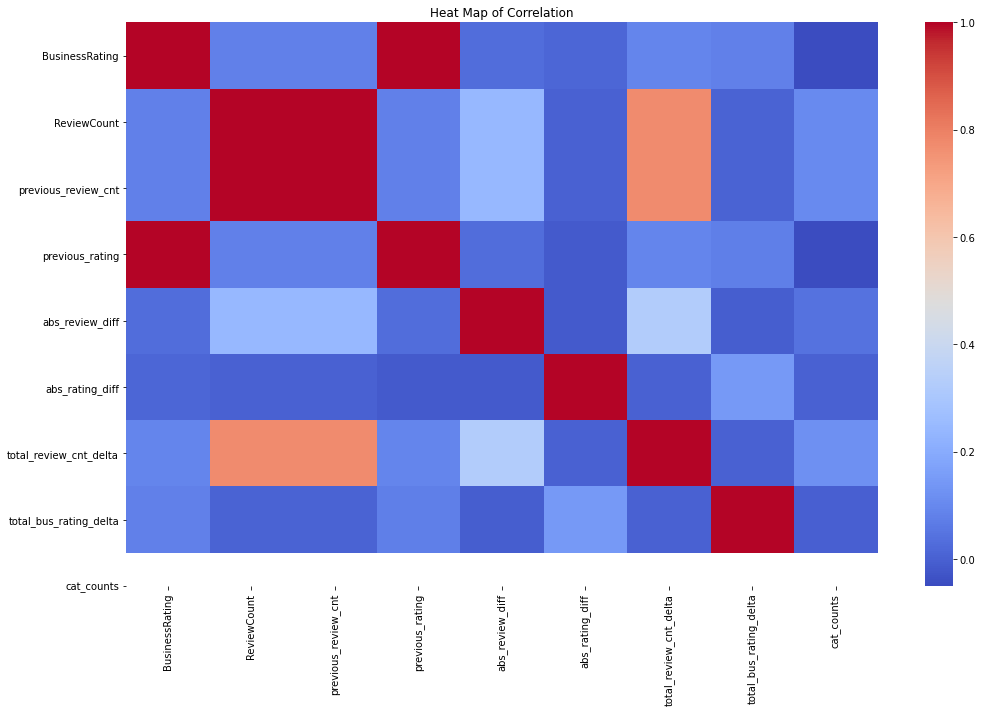

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(most_recent_bus_cats_df.corr()[:-1], xticklabels=most_recent_bus_cats_df.corr()[:-1].columns, yticklabels=most_recent_bus_cats_df.corr()[:-1].columns, cmap='coolwarm')
plt.title('Heat Map of Correlation')
plt.tight_layout()
plt.show()

Another method is to do some form of regression whether linear, non-parametric, etc.\
Before doing these however, it may be best to glance at the histograms of these variables to see if some further transformation needs to be done.

array([[<AxesSubplot:title={'center':'cat_counts'}>,
        <AxesSubplot:title={'center':'total_review_cnt_delta'}>],
       [<AxesSubplot:title={'center':'previous_review_cnt'}>,
        <AxesSubplot:title={'center':'ReviewCount'}>]], dtype=object)

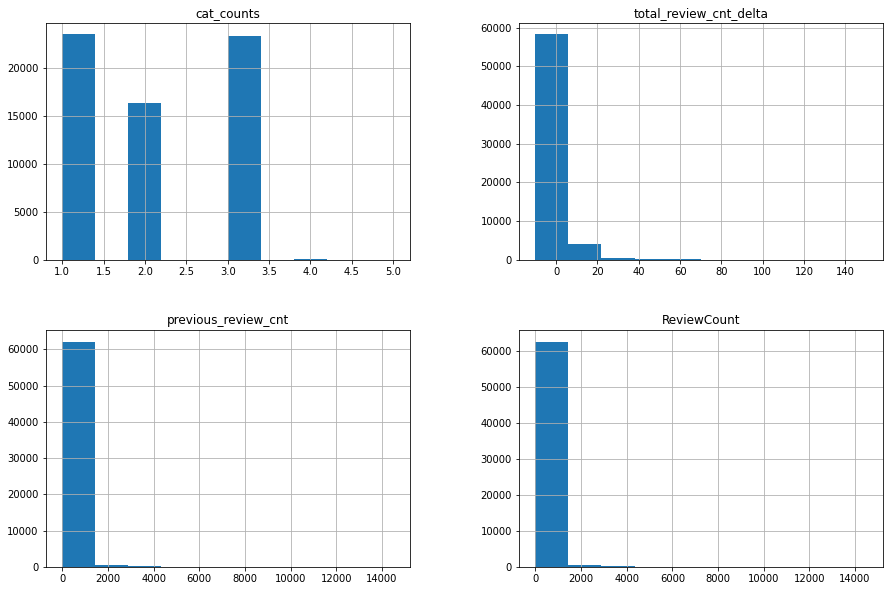

In [27]:
most_recent_bus_cats_df.hist(column=[
    'cat_counts', 'total_review_cnt_delta', 'previous_review_cnt', 'ReviewCount'], figsize=(15, 10), bins=10)

We'll come back to this question a bit later for now it seems best to just keep the variables as is.


<AxesSubplot:xlabel='cat_counts', ylabel='total_review_cnt_delta'>

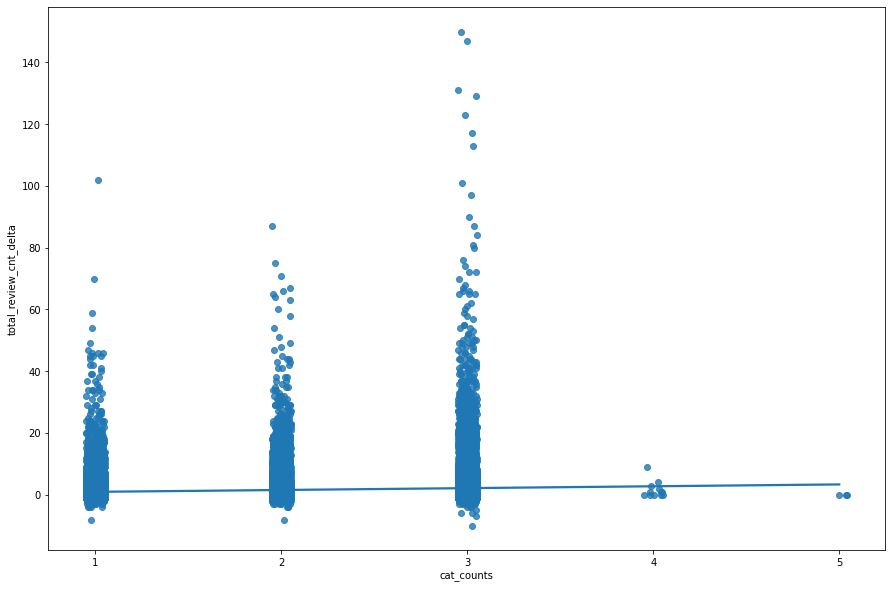

In [29]:
plt.figure(figsize=(15, 10))
sns.regplot(x=most_recent_bus_cats_df['cat_counts'], y=most_recent_bus_cats_df['total_review_cnt_delta'], x_jitter=.05)


Interesting to note is that the the businesses with 3 counts do tend to have a higher absolute review change over the observed period than businesses with less counts (i.e. less variety). However the pattern isn't linear at all now this may be due to the fact that category counts of 4 and 5 could be considered extreme values moreover, since these form part of our explanatory an option could be to remove them from our dataset. Before making such a decision we could review these observations first

We can make a quick function to assist with that

In [52]:
def bus_cat_groups(x):
    group_dict = {}
    cats = []
    for row in x:
        cats.append(row)
    group_dict['cats'] = cats
    group_dict['goe_4'] = (1 if len(cats) >= 4 else 0)
    return pd.Series(group_dict)

In [53]:
bus_cats_groups_df = bus_cats_df.groupby('BusinessName', as_index=False)['BusinessCategoryName'].apply(bus_cat_groups)
bus_cats_groups_df_cut = bus_cats_groups_df[bus_cats_groups_df['goe_4'] == 1]
bus_cats_groups_df_cut

,BusinessName,cats,goe_4
1235,alicias-sugar-shack-twain-harte-4,"[Bakeries, Breakfast & Brunch, Cafes, Coffee &...",1
5634,boathouse-restaurant-winona-lake,"[American (Traditional), Beer, Wine & Spirits,...",1
6932,bruneau-dunes-state-park-mountain-home-2,"[Landmarks & Historical Buildings, Botanical G...",1
12733,country-cafe-hot-springs,"[American (Traditional), Breakfast & Brunch, C...",1
20165,frans-world-of-beauty-praise-shop-algona,"[Accessories, Women's Clothing, Bookstores, Co...",1
23658,hedgehog-grill-waller,"[Beer, Wine & Spirits, Burgers, Comfort Food, ...",1
25206,hy-vee-dollar-fresh-centerville,"[Bakeries, Caterers, Delis, Grocery]",1
26542,jersey-girl-cafe-hamilton,"[American (New), Breakfast & Brunch, Cafes, Co...",1
36328,montezuma-super-valu-montezuma,"[Meat Shops, Delis, Grocery, Videos & Video Ga...",1
38884,oliver-ts-market-grand-blanc,"[Beer, Wine & Spirits, Caterers, Coffee & Tea,...",1


In [67]:
pd.set_option('display.max_colwidth', 100) # 50 seems to be default
bus_cats_groups_df_cut.iloc[:,:2]

,BusinessName,cats
1235,alicias-sugar-shack-twain-harte-4,"[Bakeries, Breakfast & Brunch, Cafes, Coffee & Tea]"
5634,boathouse-restaurant-winona-lake,"[American (Traditional), Beer, Wine & Spirits, Seafood, Steakhouses]"
6932,bruneau-dunes-state-park-mountain-home-2,"[Landmarks & Historical Buildings, Botanical Gardens, Parks, Campgrounds]"
12733,country-cafe-hot-springs,"[American (Traditional), Breakfast & Brunch, Cafes, Comfort Food, Desserts]"
20165,frans-world-of-beauty-praise-shop-algona,"[Accessories, Women's Clothing, Bookstores, Coffee & Tea]"
23658,hedgehog-grill-waller,"[Beer, Wine & Spirits, Burgers, Comfort Food, Southern]"
25206,hy-vee-dollar-fresh-centerville,"[Bakeries, Caterers, Delis, Grocery]"
26542,jersey-girl-cafe-hamilton,"[American (New), Breakfast & Brunch, Cafes, Coffee & Tea]"
36328,montezuma-super-valu-montezuma,"[Meat Shops, Delis, Grocery, Videos & Video Game Rental]"
38884,oliver-ts-market-grand-blanc,"[Beer, Wine & Spirits, Caterers, Coffee & Tea, Delis]"
